In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
dataset = pd.read_csv("combined_data.csv")
print(dataset.head(10))

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

   Unnamed: 0                                               text  sentiment
0           0  So there is no way for me to plug it in here i...          0
1           1                         Good case Excellent value.          1
2           2                             Great for the jawbone.          1
3           3  Tied to charger for conversations lasting more...          0
4           4                                  The mic is great.          1
5           5  I have to jiggle the plug to get it to line up...          0
6           6  If you have several dozen or several hundred c...          0
7           7        If you are Razr owner...you must have this!          1
8           8                 Needless to say I wasted my money.          0
9           9                   What a waste of money and time!.          0


# Create a subwords dataset
We will use the Amazon and Yelp reviews dataset with tensorflow_datasets's SubwordTextEncoder functionality.

SubwordTextEncoder.build_from_corpus() will create a tokenizer for us. You could also use this functionality to get subwords from a much larger corpus of text as well, but we'll just use our existing dataset here.

We'll create a subword vocab_size of only the 1,000 most common subwords, as well as cutting off each subword to be at most 5 characters.

Check out the related documentation for the the subword text encoder here.

In [3]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

#getting the vocab size
print(tokenizer.vocab_size)

999


In [4]:
n = 5
print(sentences[n])
encoded = tokenizer.encode(sentences[n])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [5]:
#decoding the encoded
for i in encoded:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [6]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [7]:
print(sentence[5])

a


# Final pre-processing
Before training, we still need to pad the sequences, as well as split into training and test sets.

In [8]:
max_length = 50
padd = 'post'
trunc = 'post'
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sentences, maxlen=max_length, truncating=trunc, padding=padd)

#getting the total lenght

total_len = int(len(sentences) * 0.8) #to get 80% of data for training

#For sentences
training_sequences = padded_sequence[0:total_len]
testing_sequences = padded_sequence[total_len:]

#For Labels
total_label = int(len(labels) * 0.8)

training_label = labels[0:total_label]
testing_label = labels[total_label:]

#Converting the labels to array for better peroformance

training_label_array = np.array(training_label)
testing_label_array = np.array(testing_label)

# Create the model using an Embedding

In [9]:
#creating model for learning data
emb_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, emb_dim, input_length = max_length))
model.add(tf.keras.layers.AveragePooling1D())
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
average_pooling1d (AveragePo (None, 25, 16)            0         
_________________________________________________________________
dense (Dense)                (None, 25, 6)             102       
_________________________________________________________________
dense_1 (Dense)              (None, 25, 1)             7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
#Training the model
history = model.fit(training_sequences, training_label_array, epochs = 100, validation_data=(testing_sequences, testing_label_array))

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5336 - val_loss: 0.6958 - val_accuracy: 0.4739
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5617 - val_loss: 0.6959 - val_accuracy: 0.4920
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5711 - val_loss: 0.6955 - val_accuracy: 0.4933
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5732 - val_loss: 0.6925 - val_accuracy: 0.4963
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5777 - val_loss: 0.6909 - val_accuracy: 0.4968
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5770 - val_loss: 0.6872 - val_accuracy: 0.4974
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5808 - val_loss: 0.6889 - val_accuracy: 0.4953
Epoch 8/100
5

50/50 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.5917 - val_loss: 0.7027 - val_accuracy: 0.4858
Epoch 59/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.5925 - val_loss: 0.7042 - val_accuracy: 0.4853
Epoch 60/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.5924 - val_loss: 0.7033 - val_accuracy: 0.4870
Epoch 61/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.5931 - val_loss: 0.7064 - val_accuracy: 0.4855
Epoch 62/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.5929 - val_loss: 0.7045 - val_accuracy: 0.4863
Epoch 63/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.5934 - val_loss: 0.7076 - val_accuracy: 0.4855
Epoch 64/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.5937 - val_loss: 0.7046 - val_accuracy: 0.4868
Epoch 65/100
50/50 

In [11]:
metrics = history.history
metric = metrics.keys()
print(metrics['loss'])

[0.6923075914382935, 0.6900423765182495, 0.6870847940444946, 0.6829031109809875, 0.6787871718406677, 0.6748066544532776, 0.6718035340309143, 0.6689823865890503, 0.6668103933334351, 0.6651570796966553, 0.6638352870941162, 0.6623894572257996, 0.661777675151825, 0.6608145236968994, 0.6599946618080139, 0.6596284508705139, 0.6592097878456116, 0.6586799621582031, 0.6582306623458862, 0.6582831144332886, 0.6578767895698547, 0.6577550172805786, 0.6570762395858765, 0.6569992303848267, 0.6568451523780823, 0.6565234065055847, 0.656399130821228, 0.6560125350952148, 0.6559035778045654, 0.6559574007987976, 0.6553865671157837, 0.6554667949676514, 0.6551516652107239, 0.6548784375190735, 0.6547346711158752, 0.6543657779693604, 0.6543165445327759, 0.6543390154838562, 0.6544133424758911, 0.6537566184997559, 0.6538907885551453, 0.6535241603851318, 0.653350293636322, 0.6531389951705933, 0.652946412563324, 0.6528929471969604, 0.6524304151535034, 0.6525232195854187, 0.652195155620575, 0.6520383954048157, 0.65

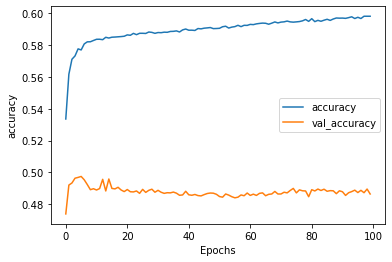

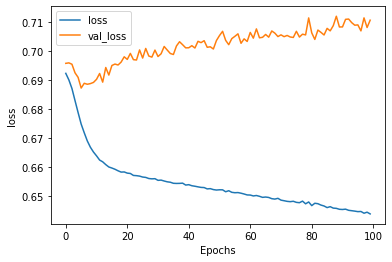

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
# Define a function to take a series of reviews
# and predict whether each one is a positive or negative review

# max_length = 100 # previously defined

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  # Keep the original sentences so that we can keep using them later
  # Create an array to hold the encoded sequences
  new_sequences = []

  # Convert the new reviews to sequences
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'

  # Pad all sequences for the new reviews
  new_reviews_padded = tf.keras.preprocessing.sequence.pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)             

  classes = model.predict(new_reviews_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_sentences)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    if (show_padded_sequence):
      print(new_reviews_padded[x])
    # Print the review as text
    print(new_sentences[x])
    # Print its predicted class
    print(classes[x])
    print("\n")

In [14]:
new_sentences = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]
predict_review(model, new_sentences)

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[[0.9611977 ]
 [0.56127715]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[[0.51147103]
 [0.684382  ]
 [0.43510622]
 [0.31061774]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5392307 ]
 [0.5

# Define a function to train and show the results of models with different layers
In the rest of this colab, we will define models, and then see the results.

Define a function that will take the model, compile it, train it, graph the accuracy and loss, and then predict some results.

In [15]:
num_epochs = 30
def fit_model(model, sentences):
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sequences, training_label_array, epochs=num_epochs, 
                        validation_data=(testing_sequences, testing_label_array))
    return history

def plot_results (history):
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
    history = fit_model(model, sentences)
    plot_results(history)
    predict_review(model, sentences)

# Add a bidirectional LSTM
Create a new model that uses a bidirectional LSTM.

Then use the function we have already defined to compile the model, train it, graph the accuracy and loss, then predict some results.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 6s 48ms/step - loss: 0.6914 - accuracy: 0.5173 - val_loss: 0.6972 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 30ms/step - loss: 0.6630 - accuracy: 0.5876 - val_lo

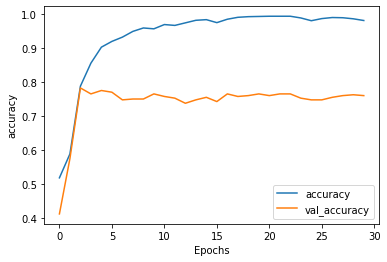

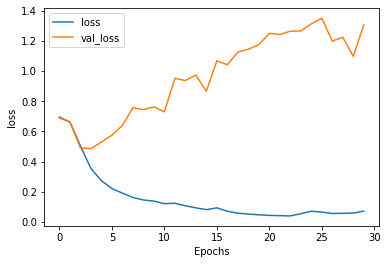

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9994099]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.01765952]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.02671936]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.17525864]


[  1 109 228 540 237 635 24

In [16]:
model_biDir_lstm = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, emb_dim, input_length = max_length),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(emb_dim)),
tf.keras.layers.Dense(units = 6, activation = 'relu'),
tf.keras.layers.Dense(units = 1, activation  = 'sigmoid')
])
fit_model_and_show_results(model_biDir_lstm, new_sentences)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 26,719
Trainable params: 26,719
Non-trainable params: 0
__________________________________________________

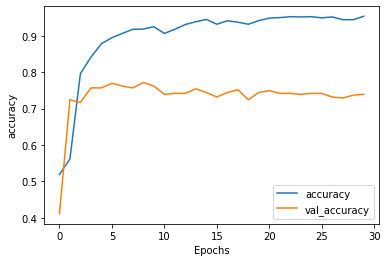

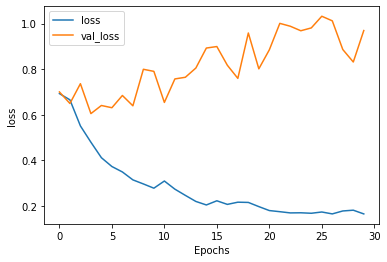

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99663246]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.09550312]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.09550312]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.09550312]


[  1 109 228 540 237 635 2

In [19]:
model_BiDir_LSTM = tf.keras.Sequential([
tf.keras.layers.Embedding(vocab_size, emb_dim, input_length = max_length),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(emb_dim, return_sequences = True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(emb_dim)),
tf.keras.layers.Dense(units = 6, activation = 'relu'),
tf.keras.layers.Dense(units = 3, activation = 'relu'),
tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

fit_model_and_show_results(model_BiDir_LSTM,new_sentences)